# Baseline & Plots

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [2]:
data = pd.read_excel('train.xlsx')

### Get the mean hour prices

In [3]:
data['month_day'] = data['PRICES'].dt.strftime('%m-%d')
daily_avg = data.groupby(data['month_day']).mean()
daily_avg = daily_avg.drop(columns=['PRICES'])
daily_avg

,Hour 01,Hour 02,Hour 03,Hour 04,Hour 05,Hour 06,Hour 07,Hour 08,Hour 09,Hour 10,...,Hour 15,Hour 16,Hour 17,Hour 18,Hour 19,Hour 20,Hour 21,Hour 22,Hour 23,Hour 24
month_day,,,,,,,,,,,,,,,,,,,,,
01-01,48.273333,48.473333,44.376667,31.290000,23.310000,21.566667,15.686667,14.840000,15.336667,19.436667,...,34.316667,31.300000,30.406667,45.146667,55.326667,56.910000,58.586667,52.410000,56.583333,49.663333
01-02,37.960000,32.546667,31.186667,24.593333,22.740000,26.613333,30.083333,44.020000,47.970000,56.550000,...,57.820000,55.190000,56.303333,69.936667,76.256667,72.346667,68.093333,56.176667,56.416667,54.053333
01-03,49.570000,43.450000,43.083333,38.220000,33.160000,40.310000,45.036667,58.570000,63.903333,66.606667,...,60.726667,60.126667,66.783333,106.606667,107.386667,84.210000,71.910000,57.166667,62.270000,63.010000
01-04,47.666667,40.563333,40.816667,35.973333,31.710000,36.636667,40.813333,48.360000,54.513333,60.336667,...,55.000000,54.536667,57.963333,79.930000,114.320000,73.500000,64.973333,56.246667,53.020000,48.183333
01-05,46.196667,42.703333,36.950000,32.153333,20.796667,31.513333,34.153333,51.000000,57.116667,61.720000,...,62.100000,62.016667,61.913333,74.600000,82.493333,70.606667,59.216667,49.200000,48.866667,48.150000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12-27,47.120000,35.023333,23.333333,18.293333,9.406667,10.720000,21.836667,25.576667,34.390000,45.676667,...,50.140000,44.360000,45.880000,56.976667,64.780000,64.010000,57.103333,43.416667,50.953333,46.083333
12-28,29.033333,24.583333,20.266667,19.313333,18.600000,26.056667,29.713333,34.836667,44.306667,49.650000,...,47.933333,45.326667,48.893333,62.460000,69.180000,64.590000,58.160000,46.290000,47.733333,47.666667
12-29,42.543333,42.630000,39.686667,31.090000,24.053333,31.096667,29.100000,42.306667,44.966667,49.670000,...,50.643333,44.013333,44.330000,59.883333,68.753333,65.313333,55.940000,45.420000,46.653333,45.216667


In [4]:
daily_avg['avg_price_per_day'] = daily_avg.filter(like='Hour').apply(lambda row: row.mean(), axis=1)
daily_avg = daily_avg.reset_index()
daily_avg[['month_day', 'avg_price_per_day']]

,month_day,avg_price_per_day
0,01-01,37.127917
1,01-02,51.492778
2,01-03,62.271389
3,01-04,55.835139
4,01-05,54.406389
...,...,...
361,12-27,41.905556
362,12-28,43.597361
363,12-29,47.021528
364,12-30,41.747917


### Avg price distribution of the training set

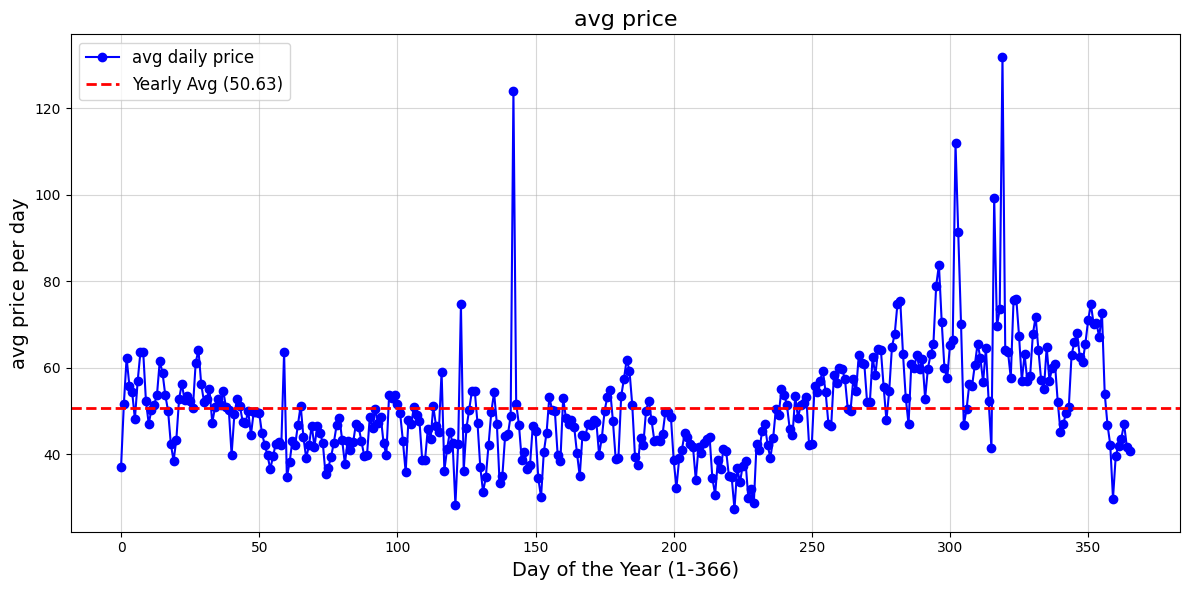

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(daily_avg.index, daily_avg['avg_price_per_day'], marker='o', linestyle='-', color='b', label='avg daily price')
plt.axhline(y=daily_avg['avg_price_per_day'].mean(), color='red', linestyle='--', linewidth=2, label=f'Yearly Avg ({daily_avg['avg_price_per_day'].mean():.2f})')
plt.title('avg price', fontsize=16)
plt.xlabel('Day of the Year (1-366)', fontsize=14)
plt.ylabel('avg price per day', fontsize=14)
plt.grid(alpha=0.5)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# Baseline 1

Take the average of each hour per calendar day and buy at the lowest price to fulfill the energy requirements.

In [6]:
# Define a function to highlight the lowest 12 values in a row
def highlight_lowest_12(row):
    # Get only "Hour" columns
    hour_cols = [col for col in row.index if col.startswith('Hour')]
    
    # Find the 12 lowest values
    lowest_indices = row[hour_cols].nsmallest(12).index
    
    # Create a style list
    style = ['background-color: yellow' if col in lowest_indices else '' for col in row.index]
    return style

In [7]:
# UNCOMMENT IF YOU WANT TO SEE WHEN WE ARE BUYING.
# lowest_daily_prices = daily_avg.style.apply(highlight_lowest_12, axis=1)
# lowest_daily_prices

In [41]:
daily_avg['daily_spending'] = daily_avg.filter(like='Hour').apply(lambda row: row.nsmallest(12).sum() * 10, axis=1)
daily_avg = daily_avg.reset_index()
daily_avg[['month_day', 'daily_spending']]

,month_day,daily_spending
0,01-01,2980.466667
1,01-02,4631.333333
2,01-03,5916.900000
3,01-04,5327.933333
4,01-05,4988.000000
...,...,...
361,12-27,3579.133333
362,12-28,3859.933333
363,12-29,4610.333333
364,12-30,3752.333333


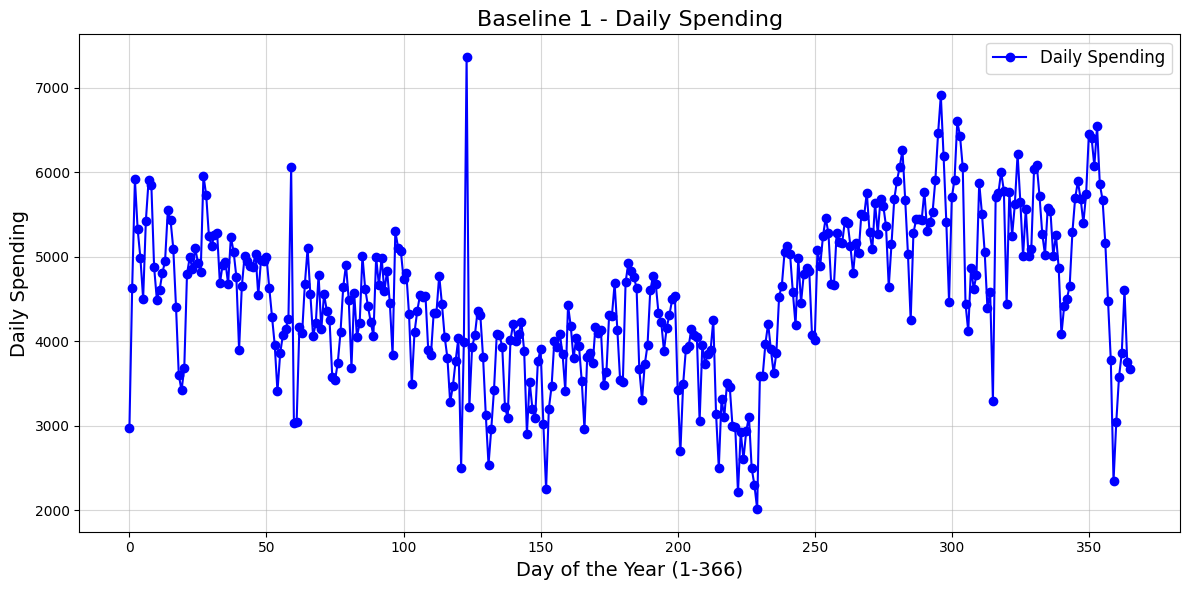

In [42]:
plt.figure(figsize=(12, 6))
plt.plot(daily_avg.index, daily_avg['daily_spending'], marker='o', linestyle='-', color='b', label='Daily Spending')
plt.title('Baseline 1 - Daily Spending', fontsize=16)
plt.xlabel('Day of the Year (1-366)', fontsize=14)
plt.ylabel('Daily Spending', fontsize=14)
plt.grid(alpha=0.5)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

Total Baseline 1 Spending on training set

In [43]:
daily_avg['daily_spending'].sum()

1654473.9666666668

# Baseline 2    

The algorithm’s decision-making process follows two stages. The first stage is similar to Baseline
1, in that a 12-hour lowest-cost selection is performed to determine the best moments to purchase
energy. The second stage introduces the heuristic that if any price of energy of the remaining hours is
lower than any of the lowest twelve prices of energy on the next day, 10 MW is purchased that can be
used as a surplus to be used on more expensive day.

In [11]:
data['month_day'] = data['PRICES'].dt.strftime('%m-%d')
daily_avg = data.groupby(data['month_day']).mean()
daily_avg = daily_avg.drop(columns=['PRICES'])
daily_avg

,Hour 01,Hour 02,Hour 03,Hour 04,Hour 05,Hour 06,Hour 07,Hour 08,Hour 09,Hour 10,...,Hour 15,Hour 16,Hour 17,Hour 18,Hour 19,Hour 20,Hour 21,Hour 22,Hour 23,Hour 24
month_day,,,,,,,,,,,,,,,,,,,,,
01-01,48.273333,48.473333,44.376667,31.290000,23.310000,21.566667,15.686667,14.840000,15.336667,19.436667,...,34.316667,31.300000,30.406667,45.146667,55.326667,56.910000,58.586667,52.410000,56.583333,49.663333
01-02,37.960000,32.546667,31.186667,24.593333,22.740000,26.613333,30.083333,44.020000,47.970000,56.550000,...,57.820000,55.190000,56.303333,69.936667,76.256667,72.346667,68.093333,56.176667,56.416667,54.053333
01-03,49.570000,43.450000,43.083333,38.220000,33.160000,40.310000,45.036667,58.570000,63.903333,66.606667,...,60.726667,60.126667,66.783333,106.606667,107.386667,84.210000,71.910000,57.166667,62.270000,63.010000
01-04,47.666667,40.563333,40.816667,35.973333,31.710000,36.636667,40.813333,48.360000,54.513333,60.336667,...,55.000000,54.536667,57.963333,79.930000,114.320000,73.500000,64.973333,56.246667,53.020000,48.183333
01-05,46.196667,42.703333,36.950000,32.153333,20.796667,31.513333,34.153333,51.000000,57.116667,61.720000,...,62.100000,62.016667,61.913333,74.600000,82.493333,70.606667,59.216667,49.200000,48.866667,48.150000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12-27,47.120000,35.023333,23.333333,18.293333,9.406667,10.720000,21.836667,25.576667,34.390000,45.676667,...,50.140000,44.360000,45.880000,56.976667,64.780000,64.010000,57.103333,43.416667,50.953333,46.083333
12-28,29.033333,24.583333,20.266667,19.313333,18.600000,26.056667,29.713333,34.836667,44.306667,49.650000,...,47.933333,45.326667,48.893333,62.460000,69.180000,64.590000,58.160000,46.290000,47.733333,47.666667
12-29,42.543333,42.630000,39.686667,31.090000,24.053333,31.096667,29.100000,42.306667,44.966667,49.670000,...,50.643333,44.013333,44.330000,59.883333,68.753333,65.313333,55.940000,45.420000,46.653333,45.216667


### Implementation

In [12]:
hourly_columns = [col for col in daily_avg.columns if col.startswith('Hour')]
array = daily_avg[hourly_columns].to_numpy()

In [13]:
carryover = []
total_per_day = []
hours_when_bought = []
for day in range(len(array)):
    todays_best_indices = np.argsort(array[day])
    if carryover:
        current_best_prices = todays_best_indices[:12 - len(carryover)]
        potential_carryover = todays_best_indices[12 - len(carryover):17 - len(carryover)]
    else:
        current_best_prices = todays_best_indices[:12]
        potential_carryover = todays_best_indices[12:17]
    if day + 1 < array.shape[0]:
        carryover = []
        next_day_best_indices = np.argsort(array[day + 1])
        next_day_best_prices = array[day + 1][next_day_best_indices][:12]
        indices = []
        for x in potential_carryover:
            price = array[day][x]
            if np.any(price < next_day_best_prices):
                carryover.append(price)
                max_index = np.argmax(next_day_best_prices)
                next_day_best_prices = np.delete(next_day_best_prices, max_index)
                indices.append(x)
                
        total_per_day.append(np.sum(array[day][current_best_prices]) + sum(carryover))
        hours_when_bought.append(np.append(current_best_prices, indices))
    else:
        total_per_day.append(np.sum(array[day][current_best_prices]))
        hours_when_bought.append(current_best_prices)
    

In [14]:
hours_when_bought[0]

array([ 7,  8,  6,  9,  5,  4, 10, 16,  3, 15, 11, 14, 13, 12,  2, 17],
      dtype=int64)

Total Baseline 2 Spending on training set

In [44]:
sum(total_per_day * 10)

1630426.2333333362

Baseline 2 is clearly better, let's validate it

# Validation of the Beseline 2

In [16]:
test_data = pd.read_excel('validate.xlsx')

In [17]:
test_data['avg_price_per_day'] = test_data.filter(like='Hour').apply(lambda row: row.mean(), axis=1)
test_data = test_data.reset_index()
test_data[['PRICES', 'avg_price_per_day']]

,PRICES,avg_price_per_day
0,2010-01-01,15.110833
1,2010-01-02,33.919583
2,2010-01-03,36.128333
3,2010-01-04,49.557500
4,2010-01-05,48.262500
...,...,...
725,2011-12-27,45.607917
726,2011-12-28,44.509583
727,2011-12-29,38.758750
728,2011-12-30,40.899583


### Simmilar plot for validation set in order to see what's going on

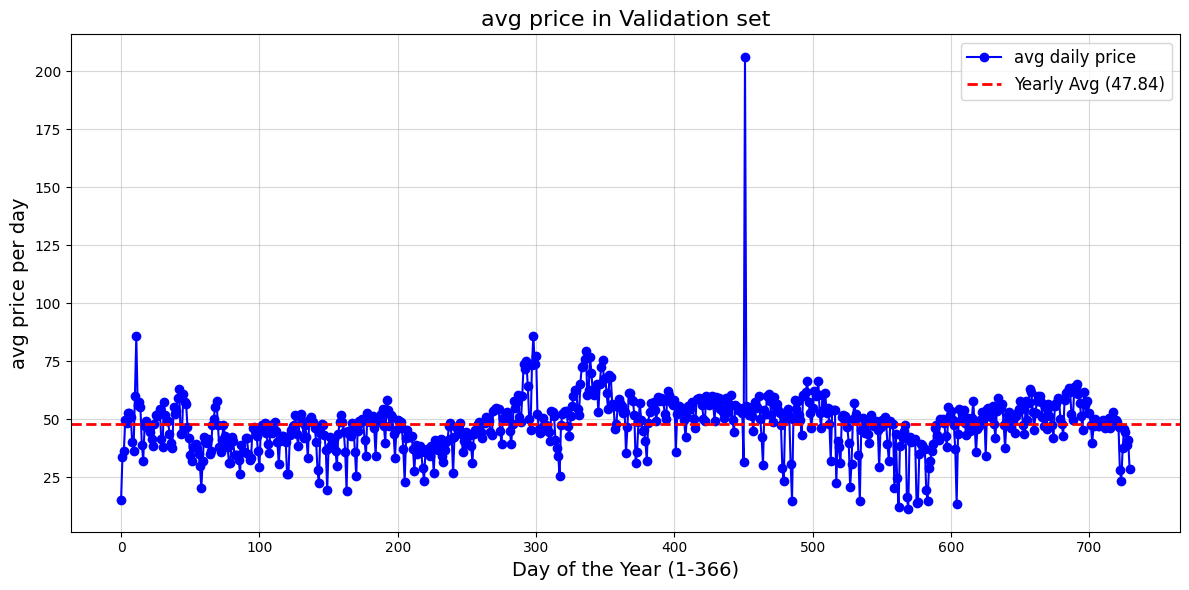

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data['avg_price_per_day'], marker='o', linestyle='-', color='b', label='avg daily price')
plt.axhline(y=test_data['avg_price_per_day'].mean(), color='red', linestyle='--', linewidth=2, label=f'Yearly Avg ({test_data['avg_price_per_day'].mean():.2f})')
plt.title('avg price in Validation set', fontsize=16)
plt.xlabel('Day of the Year (1-366)', fontsize=14)
plt.ylabel('avg price per day', fontsize=14)
plt.grid(alpha=0.5)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

In [19]:
first_year = test_data[:365]
second_year = test_data[365:]

print(len(first_year))
print(len(second_year))

365
365


We have to delete the 29th of Feb, because the validaiton set doesn't contain it.

In [20]:
type(hours_when_bought)
del hours_when_bought[59]
len(hours_when_bought)

365

### First year performance

In [21]:
hourly_columns = [col for col in first_year.columns if col.startswith('Hour')]
first_year_arr = first_year[hourly_columns].to_numpy()

In [47]:
daily_spending = np.array([
    np.sum(first_year_arr[i, ind.astype(int)]) 
    for i, ind in enumerate(hours_when_bought)
])
daily_spending = daily_spending * 10
daily_spending[0]

1677.8

In [49]:
first_year_spending = np.sum(daily_spending)
round(first_year_spending, 2)

1717069.2

In [38]:
first_year_daily = np.sum(first_year_arr, axis=1)
worst_day = np.argmax(first_year_daily)
best_day = np.argmin(first_year_daily)

let's have a closer look at the worst and best day performance

In [98]:
def show_given_day_choices(arr, day, choices):
    indices = arr[day][choices[day].astype(int)]
    colors = ['red' if price in indices else 'gray' for price in arr[day]]

    # Plot the data
    plt.figure(figsize=(12, 6))
    plt.scatter(range(1, len(arr[day]) + 1), arr[day], c=colors, edgecolor='black', s=50, alpha=0.8)

    # Add labels and title
    plt.xlabel("Hours")
    plt.ylabel("Prices")
    plt.title(f"Baseline 2 behaviour during day {day + 1 + 365}")
    plt.grid(alpha=0.3)
    plt.xticks(ticks=range(1, len(arr[day]) + 1), labels=range(1, len(arr[day]) + 1), rotation=90)

    # Create legend handles
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', label='Hold', 
               markerfacecolor='gray', markersize=8),
        Line2D([0], [0], marker='o', color='w', label='Buy', 
               markerfacecolor='red', markersize=8)
    ]
    plt.legend(handles=legend_elements, loc='best')

    # Show the plot
    plt.show()

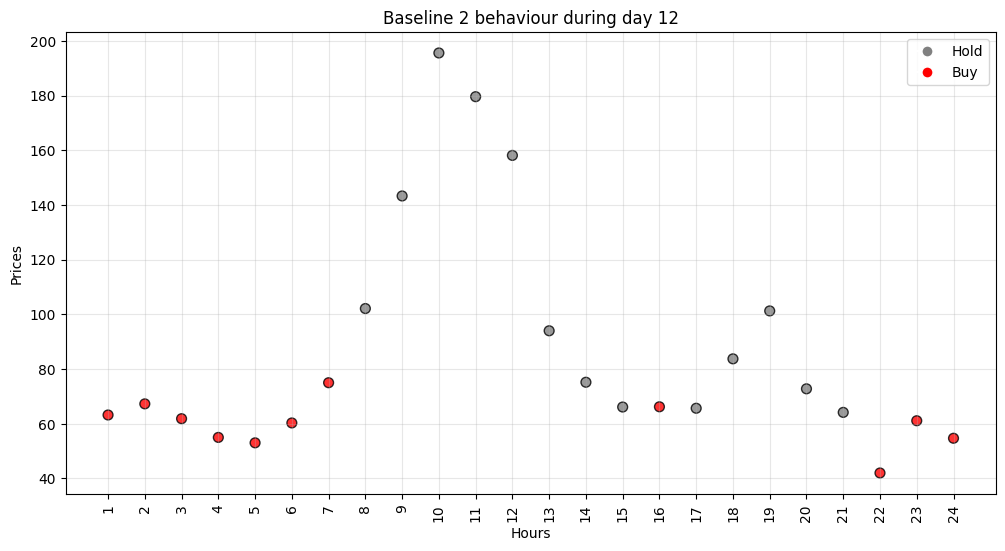

In [96]:
show_given_day_choices(first_year_arr, 11, hours_when_bought)

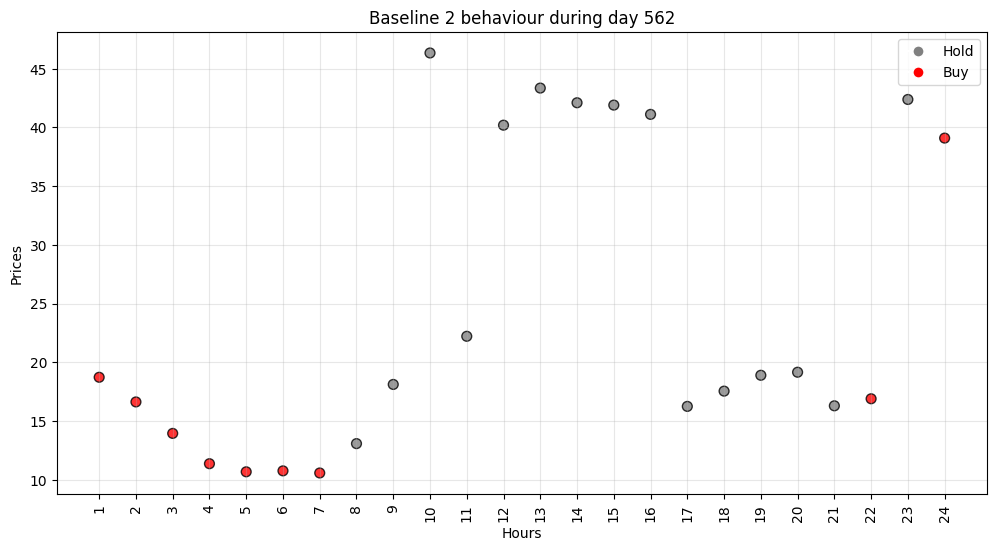

In [99]:
second_year_arr = second_year[hourly_columns].to_numpy()
show_given_day_choices(second_year_arr, 196, hours_when_bought)

### Second year performance

In [100]:
hourly_columns = [col for col in second_year.columns if col.startswith('Hour')]
second_year_arr = second_year[hourly_columns].to_numpy()

In [101]:
daily_spending = np.array([
    np.sum(second_year_arr[i, ind.astype(int)]) 
    for i, ind in enumerate(hours_when_bought)
])
second_year_spending = sum(daily_spending * 10)
round(second_year_spending, 2)

1844388.0

In [ ]:
second_year_daily = np.sum(second_year_arr, axis=1)
worst_day = np.argmax(second_year_daily)
best_day = np.argmin(second_year_daily)
show_given_day_choices(second_year_arr, worst_day, hours_when_bought)

TypeError: show_given_day_choices() takes 3 positional arguments but 4 were given

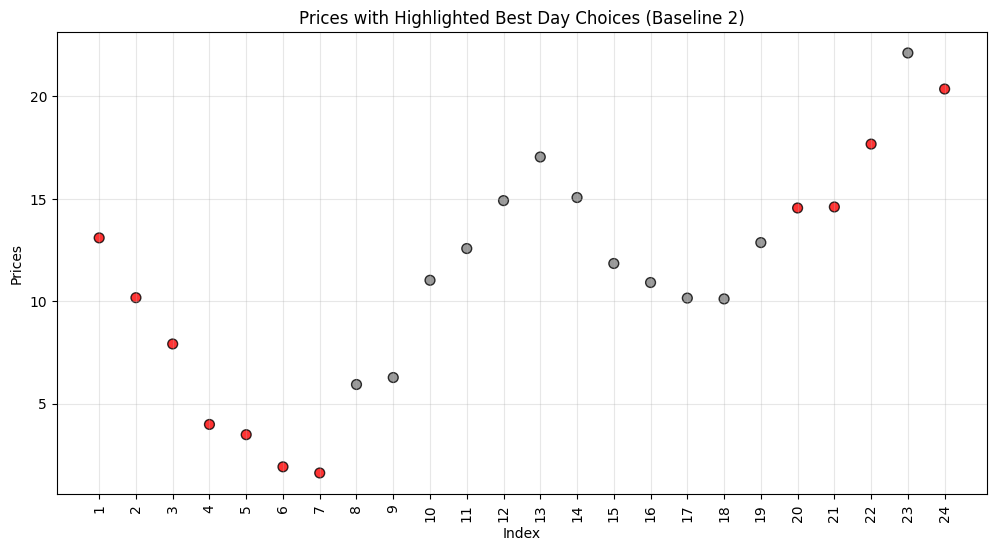

In [35]:
show_given_day_choices(second_year_arr, best_day, hours_when_bought, 'Best')

# Baseline 2 performance on the validation set

In [53]:
round(first_year_spending + second_year_spending, 2)

3561457.2